In [1]:
# Librería para manipulación y análisis de datos
import pandas as pd

In [2]:
# Descargar archivo preprocesado 
!wget http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv

--2021-07-04 22:50:21--  http://108.62.123.70/GarmentProd/new_number_garments_worker_productivity.csv
Connecting to 108.62.123.70:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 73094 (71K) [text/csv]
Saving to: ‘new_number_garments_worker_productivity.csv.3’

new_number_garments 100%[===================>]  71.38K  --.-KB/s    in 0.02s   

2021-07-04 22:50:22 (2.85 MB/s) - ‘new_number_garments_worker_productivity.csv.3’ saved [73094/73094]



In [3]:
%ls

new_number_garments_worker_productivity.csv
new_number_garments_worker_productivity.csv.1
new_number_garments_worker_productivity.csv.2
new_number_garments_worker_productivity.csv.3
sample_data/
scikit-learn/


In [4]:
#Lectura del grupo de datos CSV
file_name = "new_number_garments_worker_productivity.csv"

#El método "read_csv" nos permite leer un CSV
dataset = pd.read_csv(file_name)

In [5]:
print(dataset.head())

   date  quarter  ...  no_of_workers  actual_productivity
0    56        1  ...           59.0             0.940725
1    56        1  ...            8.0             0.886500
2    56        1  ...           30.5             0.800570
3    56        1  ...           30.5             0.800570
4    56        1  ...           56.0             0.800382

[5 rows x 15 columns]


In [6]:
print(dataset.shape)

(1197, 15)


In [7]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   int64  
 1   quarter                1197 non-null   int64  
 2   department             1197 non-null   int64  
 3   day                    1197 non-null   int64  
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [8]:
print(dataset.describe())

              date      quarter  ...  no_of_workers  actual_productivity
count  1197.000000  1197.000000  ...    1197.000000          1197.000000
mean     28.917293     2.020050  ...      34.609858             0.735091
std      17.098789     1.557568  ...      22.197687             0.174488
min       0.000000     0.000000  ...       2.000000             0.233705
25%      14.000000     1.000000  ...       9.000000             0.650307
50%      29.000000     1.000000  ...      34.000000             0.773333
75%      44.000000     4.000000  ...      57.000000             0.850253
max      58.000000     4.000000  ...      89.000000             1.120437

[8 rows x 15 columns]


#XGBoost

XGBoost es una biblioteca optimizada de aumento de gradiente distribuida diseñada para ser altamente eficiente, flexible y portátil. Implementa algoritmos de aprendizaje automático bajo el marco Gradient Boosting. XGBoost proporciona un aumento de árbol paralelo (también conocido como GBDT, GBM) que resuelve muchos problemas de ciencia de datos de una manera rápida y precisa. 

Fuente: XGBoost Documentation

https://xgboost.readthedocs.io/en/latest/

Fuente: XGBoost Documentation - Python API Reference

https://xgboost.readthedocs.io/en/latest/python/python_api.html

Fuente: DataCamp - Using XGBoost in Python 

https://www.datacamp.com/community/tutorials/xgboost-in-python

Fuente: Installing the development version of scikit-learn

https://scikit-learn.org/dev/developers/advanced_installation.html

In [9]:
#Instalación de nueva versión de Science Kit Learn v0.24, la actual es v0.23 - Para soportar mean_absolute_percentage_error de sklearn.metrics
!git clone git://github.com/scikit-learn/scikit-learn.git  # add --depth 1 if your connection is slow
%cd scikit-learn
!pip install cython
!pip install --verbose --no-build-isolation --editable .
!python -c "import sklearn; sklearn.show_versions()"

fatal: destination path 'scikit-learn' already exists and is not an empty directory.
/content/scikit-learn
Created temporary directory: /tmp/pip-ephem-wheel-cache-0h12eb_g
Created temporary directory: /tmp/pip-req-tracker-29a3tnda
Created requirements tracker '/tmp/pip-req-tracker-29a3tnda'
Created temporary directory: /tmp/pip-install-6ne7y7fu
Obtaining file:///content/scikit-learn
  Added file:///content/scikit-learn to build tracker '/tmp/pip-req-tracker-29a3tnda'
    Created temporary directory: /tmp/pip-modern-metadata-5ahgbzfd
    Running command /usr/bin/python3 /usr/local/lib/python3.7/dist-packages/pip/_vendor/pep517/_in_process.py prepare_metadata_for_build_wheel /tmp/tmptvr3k0e2
    C compiler: x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-OGiuun/python3.7-3.7.10=. -fs

In [10]:
# Cargar librerías como XGBoost y Grid Search CV y otras herramientas
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
#from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [11]:
# Dividir variables dependientes de la variable dependiente
X, y = dataset.iloc[:,:-1],dataset.iloc[:,-1]

In [12]:
# Verificar división
print(X)
print(X.shape)
print(y)
print(y.shape)

      date  quarter  department  ...  idle_men  no_of_style_change  no_of_workers
0       56        1           0  ...         0                   0           59.0
1       56        1           2  ...         0                   0            8.0
2       56        1           0  ...         0                   0           30.5
3       56        1           0  ...         0                   0           30.5
4       56        1           0  ...         0                   0           56.0
...    ...      ...         ...  ...       ...                 ...            ...
1192     3        4           1  ...         0                   0            8.0
1193     3        4           1  ...         0                   0            8.0
1194     3        4           1  ...         0                   0            8.0
1195     3        4           1  ...         0                   0           15.0
1196     3        4           1  ...         0                   0            6.0

[1197 rows x 14

Now you will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. 

In [13]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [14]:
print(data_dmatrix)

Dividiremos nuestro conjunto de datos para usar el 15% para el entrenamiento y dejar el resto para la validación. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10025, random_state=123)

Hiperparámetros de XGBoost

En este punto, antes de construir el modelo, debe conocer los parámetros de ajuste que proporciona XGBoost. Los más comunes que debes conocer son:

learning_rate: encogimiento del tamaño del paso que se utiliza para evitar el sobreajuste. El rango es [0,1].

max_depth: determina la profundidad con la que se permite que cada árbol crezca durante cualquier ronda de impulso.

subsample: porcentaje de muestras utilizadas por árbol. Un valor bajo puede provocar un desajuste.

colsample_bytree: porcentaje de características utilizadas por árbol. Un valor elevado puede provocar un sobreajuste.

n_estimators: número de árboles que desea construir.

objective: determina la función de pérdida a utilizar como reg: linear para problemas de regresión, reg: logistic para problemas de clasificación con decisión única, binary: logistic para problemas de clasificación con probabilidad.

XGBoost también admite parámetros de regularización para penalizar los modelos a medida que se vuelven más complejos y reducirlos a modelos simples (parsimoniosos).

gamma: controla si un nodo determinado se dividirá en función de la reducción esperada en la pérdida después de la división. Un valor más alto conduce a menos divisiones. Solo se admite para estudiantes basados ​​en árboles.

alfa: regularización L1 en pesos de hojas. Un valor elevado conduce a una mayor regularización.

lambda: regularización L2 en pesos de hojas y es más suave que la regularización L1.

También vale la pena mencionar que, aunque está utilizando árboles como sus aprendizes base (gbtree), también puede utilizar los aprendizes de base lineal (gblinear) relativamente menos populares de XGBoost y otro aprendiz de árbol conocido como dardo (dart). Todo lo que tiene que hacer es establecer el parámetro de refuerzo en gbtree (predeterminado), gblinear o dart.

In [16]:
#Verificar el número de muestras de prueba
print(X_test.shape)
print(y_test.shape)

(120, 14)
(120,)


In [17]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 10, alpha = 10, n_estimators = 100)

Ajustar modelo de regresión. Ahora iniciaremos XGBoost y los ajustaremos con nuestros datos de entrenamiento. Veamos también el error cuadrático medio en los datos de validación, la raíz del error cuadrático medio en los datos de validación y el puntaje (score) de entrenamiento y validación.

In [18]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

In [19]:
mse = mean_squared_error(y_test, preds)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0205


In [20]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.143013


In [21]:
mae = mean_absolute_error(y_test, preds)
print("MAE: %f" % (mae))

MAE: 0.092711


In [22]:
mape = mean_absolute_percentage_error(y_test, preds)
print("MAPE: %f" % (mape))

MAPE: 0.173846


In [23]:
xg_reg_score_train = xg_reg.score(X_train, y_train)
print(xg_reg_score_train)

0.9618660001531391


In [24]:
xg_reg_score_test = xg_reg.score(X_test, y_test)
print(xg_reg_score_test)

0.3813134157847168


El entrenamiento no presenta sobreajuste (overfitting) y el puntaje con datos de validación son bajos.

In [25]:
# Mostrar predicciones
print(preds)
print(len(preds))
print(preds.shape)

[0.65743136 0.9569348  0.67402935 0.7489309  0.70529455 0.74016625
 0.87795544 0.3550561  0.7119142  0.6465444  0.9991914  0.75584006
 0.9245927  0.68591356 0.7736605  0.6102903  0.8918501  0.86735916
 0.6666134  0.56224203 0.56827706 0.6571411  0.7980863  0.88845515
 0.8621056  0.8534914  0.68923247 0.7930547  0.60701346 0.55478895
 0.7923007  0.7426144  0.7782353  0.62528753 0.66939735 0.81338763
 0.602199   0.8214972  0.69549036 0.63477623 0.5653771  0.8686346
 0.88749456 0.7593979  0.6771387  0.5504608  0.8149819  0.87623805
 0.5928463  0.8596832  0.51651114 0.6187464  0.89145094 0.6225103
 0.7978711  0.56944764 0.96966636 0.80118895 0.670599   0.9025898
 0.80538607 0.91449547 0.6499607  0.56310713 0.80671906 0.6218708
 0.81569874 0.7607955  0.76741236 0.5718496  0.6603136  0.6955303
 0.6107021  0.8473797  0.9166094  0.8331593  0.7528703  0.9584495
 0.8105663  0.7572978  0.78921926 0.7194232  0.91616213 0.7327634
 0.6860177  0.8752457  0.45036706 0.7535607  0.7025347  0.8501133
 0.

In [26]:
#Mostrar datos verdaderos y de prueba
print(y_test)
print(len(y_test))
print(y_test.shape)

156     0.817424
529     0.971867
856     0.684028
895     0.700614
35      0.701812
          ...   
906     0.800137
1017    0.750396
154     0.850137
680     0.800402
842     0.256500
Name: actual_productivity, Length: 120, dtype: float64
120
(120,)


Convierta el árbol especificado en una instancia de graphviz. IPython puede trazar automáticamente la instancia de graphiz devuelta. De lo contrario, debe llamar al método .render() de la instancia de graphiz devuelta.

xgboost.to_graphviz(booster, fmap='', num_trees=0, rankdir=None, yes_color=None, no_color=None, condition_node_params=None, leaf_node_params=None, **kwargs)

Parámetros:

booster (Booster, XGBModel) – Booster or XGBModel (Modelo XGB).

fmap (str (optional)) – El nombre del archivo de mapa de características.

num_trees (int, default 0) – Especifique el número ordinal del árbol de destino.

rankdir (str, default "UT") – Pasado a graphviz a través de graph_attr.

yes_color (str, default '#0000FF') – Color de borde cuando cumple con la condición del nodo.

no_color (str, default '#FF0000') – Color de borde cuando no cumple con la condición del nodo.

condition_node_params (dict, optional) – Condición de la configuración del nodo para graphviz.

Ejemplo:

{'shape': 'box', 'style': 'filled,rounded', 'fillcolor': '#78bceb'}

leaf_node_params (dict, optional) – Configuración del nodo hoja para graphviz.

Ejemplo:

{'shape': 'box', 'style': 'filled', 'fillcolor': '#e48038'}

**kwargs (dict, optional) – Otras palabras clave pasadas a graphviz graph_attr, p. Ej. graph [ {key} = {value} ]


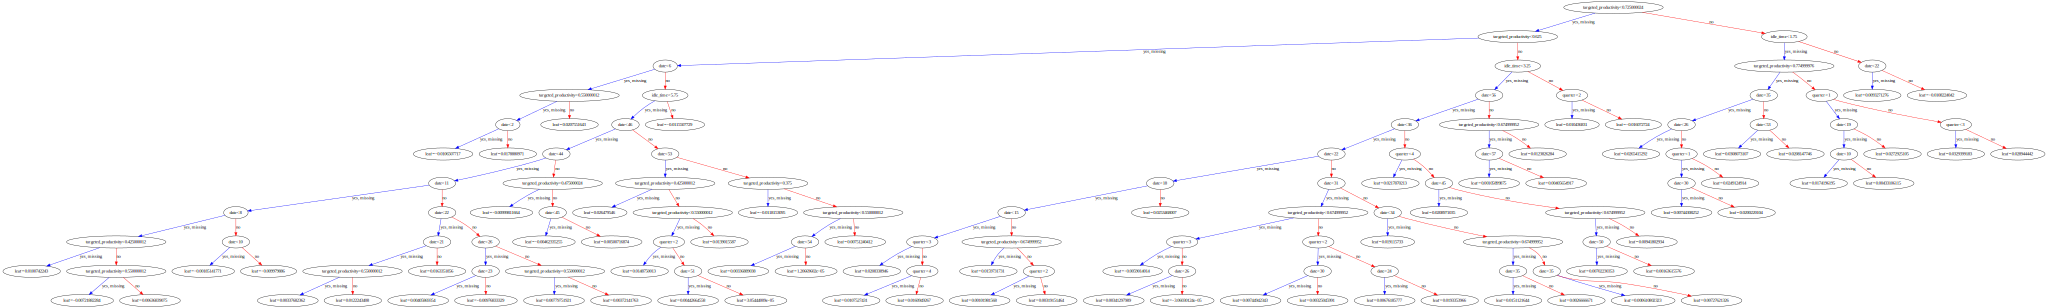

In [27]:
xgb.to_graphviz(xg_reg,num_trees=0)

Importancia de las características. Importancias de características basadas en impurezas y basadas en permutación.

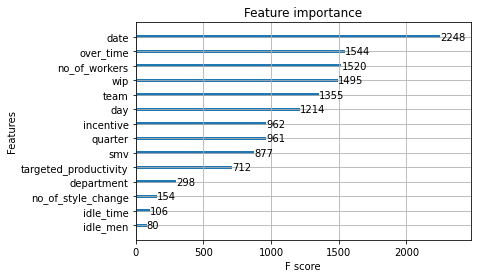

In [28]:
xgb.plot_importance(xg_reg, max_num_features=15)
#plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Visualizaremos los valores "y" de validación y comparados con los valores predecidos con el entrenamiento en una gráfica.

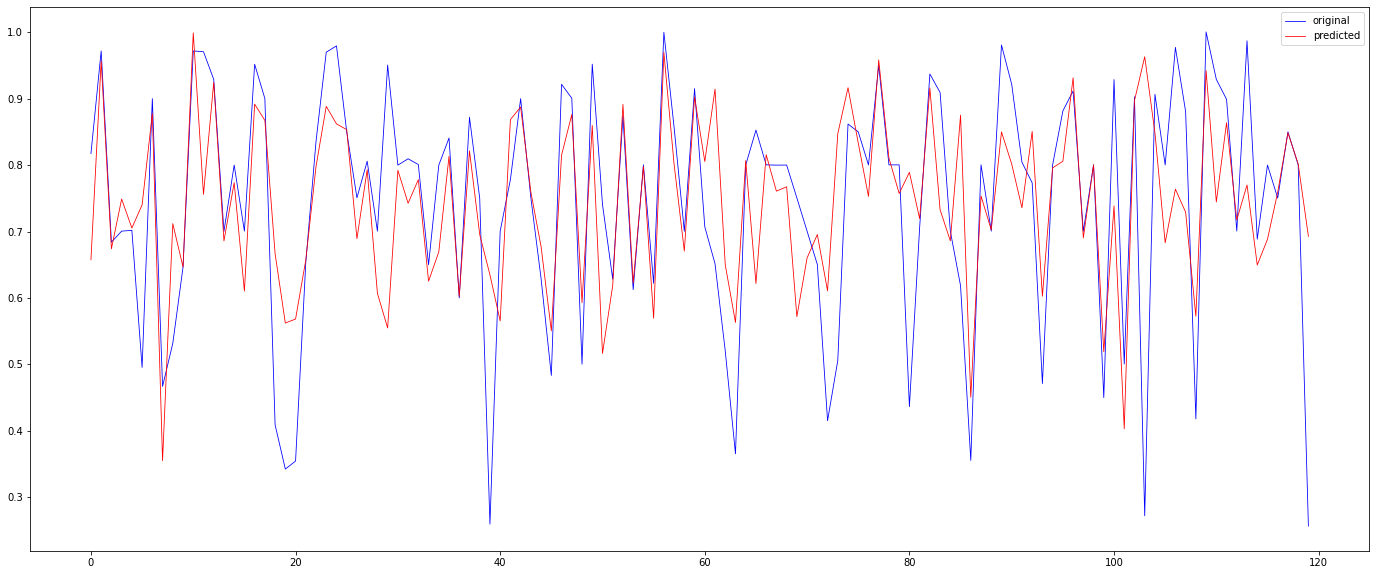

In [29]:
x_ax = range(len(y_test))
plt.figure(figsize=(24,10))
#plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, preds, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#GridSearchCV.
Es una clase contenedora proporcionada por sklearn que recorre todos los parámetros proporcionados como parámetro params_grid con una serie de pliegues de validación cruzada proporcionados como parámetro cv, evalúa el rendimiento del modelo en todas las combinaciones y almacena todos los resultados en el atributo cv_results_. También almacena el modelo que se desempeña mejor en todos los pliegues de validación cruzada en el atributo best_estimator_ y la mejor puntuación en el atributo best_score_.

El parámetro n_jobs lo proporcionan muchos estimadores. Acepta el número de núcleos que se utilizarán para la paralelización. Si se da el valor de -1, entonces usa todos los núcleos. Utiliza la biblioteca de procesamiento paralelo joblib para ejecutar cosas en paralelo en segundo plano.

Probaremos varios valores para los hiperparámetros mencionados anteriormente para encontrar el mejor estimador para nuestro conjunto de datos haciendo una validación cruzada.

Fuente: Science Kit, scikit-learn, Machine Learning in Python

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [30]:
# Verificar datos de entrenamiento
print(X_train.shape[0])
print(X_train.shape[1])

1077
14


In [31]:
# Establecer parámetros a probar

%%time

#xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 10, alpha = 10, n_estimators = 100)

params = { 'objective':['reg:squarederror'], 
           'colsample_bytree':[0.1,0.3,0.5,0.75],
           'learning_rate':[0.025,0.05,0.1,0.15], 
           'max_depth':[4,8,12], 
           'alpha':[2.5,5,10], 
           'n_estimators':[50,100,150,200,250]}

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 7.87 µs


In [32]:
# Evaluar Grid Search CV con los parámetros para XGBoost usando datos de entrenamiento
xgb_regressor_grid = GridSearchCV(xgb.XGBRegressor(random_state=123), param_grid =params, cv=5, n_jobs=-1, verbose=1)
xgb_regressor_grid.fit(X_train, y_train)



Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=XGBRegressor(random_state=123), n_jobs=-1,
             param_grid={'alpha': [2.5, 5, 10],
                         'colsample_bytree': [0.1, 0.3, 0.5, 0.75],
                         'learning_rate': [0.025, 0.05, 0.1, 0.15],
                         'max_depth': [4, 8, 12],
                         'n_estimators': [50, 100, 150, 200, 250],
                         'objective': ['reg:squarederror']},
             verbose=1)

In [33]:
# Se muestran los mejores puntajes y mejor modelo 
print('Train R^2 Score : %.3f'%xgb_regressor_grid.best_estimator_.score(X_train, y_train))
print('Test R^2 Score : %.3f'%xgb_regressor_grid.best_estimator_.score(X_test, y_test))
print('Best R^2 Score Through Grid Search : %.3f'%xgb_regressor_grid.best_score_)
print('Best Parameters : ',xgb_regressor_grid.best_params_)

Train R^2 Score : 0.917
Test R^2 Score : 0.416
Best R^2 Score Through Grid Search : 0.533
Best Parameters :  {'alpha': 2.5, 'colsample_bytree': 0.5, 'learning_rate': 0.025, 'max_depth': 8, 'n_estimators': 200, 'objective': 'reg:squarederror'}


Impresión de los primeros resultados de validación cruzada. GridSearchCV mantiene los resultados de todas las combinaciones de parámetros probadas con todas las divisiones de validación cruzada. Podemos acceder a los resultados de todas las iteraciones como un diccionario llamando al atributo cv_results_ en él.

In [34]:
cross_val_results = pd.DataFrame(xgb_regressor_grid.cv_results_)
print('Number of Various Combinations of Parameters Tried : %d'%len(cross_val_results))

cross_val_results.head() ## Printing first few results.

Number of Various Combinations of Parameters Tried : 720


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_colsample_bytree,param_learning_rate,param_max_depth,param_n_estimators,param_objective,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.043436,0.011000,0.003090,0.000187,2.5,0.1,0.025,4,50,reg:squarederror,"{'alpha': 2.5, 'colsample_bytree': 0.1, 'learn...",-0.035876,0.073635,0.125161,-0.055698,0.026197,0.026684,0.067235,718
1,0.057188,0.000992,0.003517,0.000051,2.5,0.1,0.025,4,100,reg:squarederror,"{'alpha': 2.5, 'colsample_bytree': 0.1, 'learn...",0.253706,0.244658,0.319662,0.259351,0.256776,0.266831,0.026878,694
2,0.079245,0.000464,0.004032,0.000089,2.5,0.1,0.025,4,150,reg:squarederror,"{'alpha': 2.5, 'colsample_bytree': 0.1, 'learn...",0.324791,0.278925,0.372347,0.333201,0.316485,0.325150,0.030014,664
3,0.109373,0.006751,0.004665,0.000113,2.5,0.1,0.025,4,200,reg:squarederror,"{'alpha': 2.5, 'colsample_bytree': 0.1, 'learn...",0.378030,0.312123,0.418417,0.391882,0.357054,0.371501,0.035759,646
4,0.127219,0.001129,0.005245,0.000108,2.5,0.1,0.025,4,250,reg:squarederror,"{'alpha': 2.5, 'colsample_bytree': 0.1, 'learn...",0.405309,0.331719,0.449755,0.422630,0.374493,0.396781,0.040686,613


# Evaluación del mejor modelo 

In [35]:
# Predecir usando datos de prueba solamente
xgb_regressor_grid_predict_train = xgb_regressor_grid.predict(X_train)
xgb_regressor_grid_predict = xgb_regressor_grid.predict(X_test)

Veamos también el error cuadrático medio en los datos de prueba, la raíz del error cuadrático medio en los datos de prueba y el puntaje (score) de entrenamiento y pruebas.

In [36]:
mse = mean_squared_error(y_train, xgb_regressor_grid_predict_train)
print("The mean squared error (MSE) on train set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0025


In [37]:
rmse = np.sqrt(mean_squared_error(y_train, xgb_regressor_grid_predict_train))
print("RMSE: %f" % (rmse))

RMSE: 0.050128


In [38]:
mae = mean_absolute_error(y_train, xgb_regressor_grid_predict_train)
print("MAE: %f" % (mae))

MAE: 0.029874


In [39]:
mape = mean_absolute_percentage_error(y_train, xgb_regressor_grid_predict_train)
print("MAPE: %f" % (mape))

MAPE: 0.050491


In [40]:
reg_score_train = xgb_regressor_grid.score(X_train, y_train)
print(reg_score_train)

0.9165683111406373


In [41]:
mse = mean_squared_error(y_test, xgb_regressor_grid_predict)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.0193


In [42]:
rmse = np.sqrt(mean_squared_error(y_test, xgb_regressor_grid_predict))
print("RMSE: %f" % (rmse))

RMSE: 0.138966


In [43]:
mae = mean_absolute_error(y_test, xgb_regressor_grid_predict)
print("MAE: %f" % (mae))

MAE: 0.086296


In [44]:
mape = mean_absolute_percentage_error(y_test, xgb_regressor_grid_predict)
print("MAPE: %f" % (mape))

MAPE: 0.162958


In [45]:
reg_score_test = xgb_regressor_grid.score(X_test, y_test)
print(reg_score_test)

0.4158323035603193


El puntaje mejoró para datos de entrenamiento sin sobreajuste y para datos de prueba.

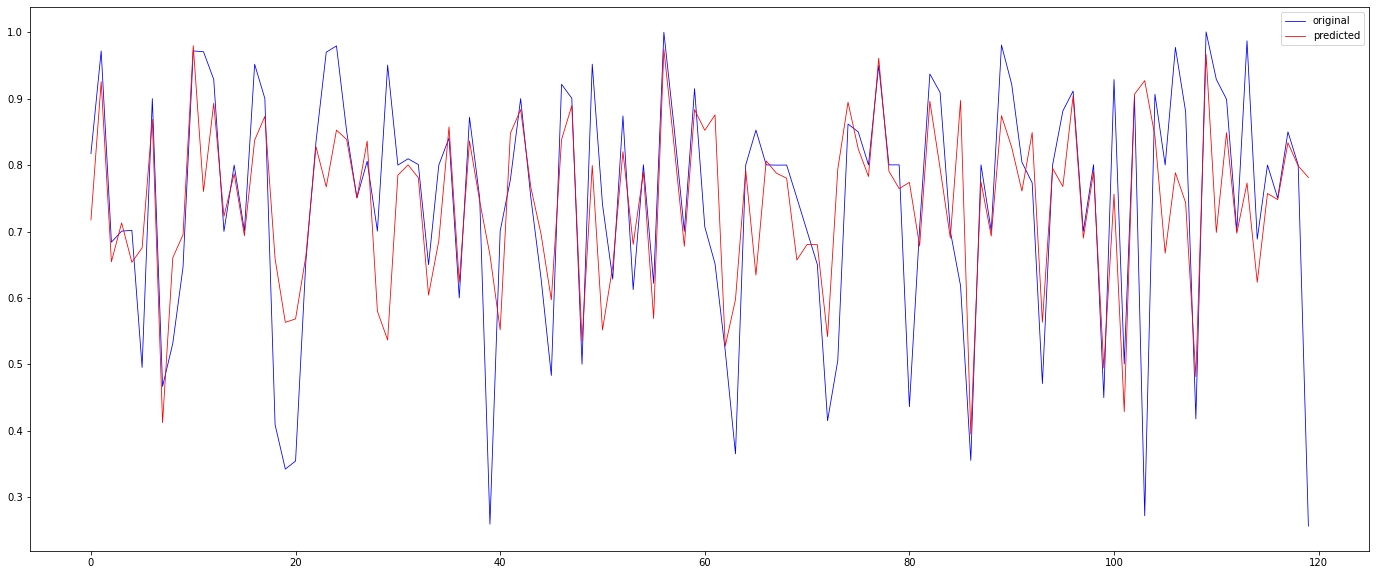

In [46]:
x_ax = range(len(y_test))
plt.figure(figsize=(24,10))
#plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.plot(x_ax, y_test, lw=0.8, color="blue", label="original")
plt.plot(x_ax, xgb_regressor_grid_predict, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()